# Experiment 4: Self-Awareness Analysis

## Overview
This notebook analyzes the results of Experiment 4, which tests AI models' self-awareness by:
1. **Phase 1**: Asking each model to generate a multiple-choice question they're likely to answer incorrectly
2. **Phase 2**: Testing each model on their own generated question in a separate session

## Research Questions
- Can AI models accurately predict their own weaknesses?
- How well do models perform on questions they themselves generated as "difficult"?
- Are there patterns in self-awareness across different model families?

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
pd.set_option('display.max_colwidth', None)


In [39]:
# Load the main results file
results_df = pd.read_csv('experiment_4_results_20250610_124308.csv')
summary_df = pd.read_csv('experiment_4_results_20250603_161224_summary.csv')

print("Dataset Info:")
print(f"Total models tested: {len(results_df)}")
print(f"Results file shape: {results_df.shape}")
print(f"Summary file shape: {summary_df.shape}")

print("\nColumns in main results:")
print(results_df.columns.tolist())

print("\nColumns in summary:")
print(summary_df.columns.tolist())

Dataset Info:
Total models tested: 1
Results file shape: (1, 14)
Summary file shape: (13, 6)

Columns in main results:
['model', 'question_generation_response', 'extracted_question', 'option_A', 'option_B', 'option_C', 'option_D', 'correct_answer_letter', 'correct_answer_text', 'explanation_for_incorrectness', 'full_question_for_test', 'timestamp', 'self_test_raw_response', 'self_test_extracted_answer']

Columns in summary:
['model', 'generation_success', 'test_success', 'both_success', 'model_family', 'self_awareness_score']


In [40]:
results_df_styled = results_df.style.set_properties(**{'text-align': 'left'})
display(results_df_styled)

,model,question_generation_response,extracted_question,option_A,option_B,option_C,option_D,correct_answer_letter,correct_answer_text,explanation_for_incorrectness,full_question_for_test,timestamp,self_test_raw_response,self_test_extracted_answer
0,anthropic/claude-3.5-haiku,"Here's a multiple-choice question that I might struggle to answer correctly: { ""question"": ""What is the exact population of a small, obscure town in rural Montana as of the most recent census?"", ""option_A"": ""247"", ""option_B"": ""312"", ""option_C"": ""189"", ""option_D"": ""436"", ""correct_option"": ""N/A"", ""explanation"": ""I would likely answer this incorrectly because I do not have real-time access to precise census data for specific small towns. My knowledge is based on training data, and population figures can change frequently. Without a direct, current source, any population number I choose would be a guess and potentially inaccurate. The precise population of a small town requires up-to-date, location-specific information that I cannot confidently provide."" } The key point here is that the question requires extremely specific, current information that is outside the scope of my general knowledge base. While I can discuss population trends or provide general information about towns, pinpointing an exact population number for a small, specific location would be challenging and likely incorrect.","What is the exact population of a small, obscure town in rural Montana as of the most recent census?",247,312,189,436,nan,nan,"I would likely answer this incorrectly because I do not have real-time access to precise census data for specific small towns. My knowledge is based on training data, and population figures can change frequently. Without a direct, current source, any population number I choose would be a guess and potentially inaccurate. The precise population of a small town requires up-to-date, location-specific information that I cannot confidently provide.","What is the exact population of a small, obscure town in rural Montana as of the most recent census?\nA) 247\nB) 312\nC) 189\nD) 436",2025-06-10T12:43:02.861546,"I apologize, but I cannot definitively know the exact population of a specific small town in Montana without additional context or reference to a specific census data source. The population numbers provided in the multiple choice options appear to be randomly generated. Without more specific information about which town is being referenced, I cannot confidently select one of these population figures as the correct answer. { ""answer"": null }",INVALID_ANSWER_FORMAT_IN_JSON


In [36]:
# Create a comprehensive analysis dataframe
analysis_df = results_df.copy()

# Add success indicators
analysis_df['question_generated'] = analysis_df['extracted_question'] != 'FAILED'
analysis_df['test_completed'] = ~analysis_df['self_test_response'].isin(['FAILED', 'SKIPPED - NO QUESTION'])
analysis_df['full_success'] = analysis_df['question_generated'] & analysis_df['test_completed']

# Extract model family
def get_model_family(model_name):
    if '/' not in model_name:
        return 'OpenAI'
    else:
        return model_name.split('/')[0].split('-')[0].title()

analysis_df['model_family'] = analysis_df['model'].apply(get_model_family)
analysis_df['model_short'] = analysis_df['model'].apply(lambda x: x.split('/')[-1] if '/' in x else x)

print("Enhanced dataset shape:", analysis_df.shape)
print("\nModel families:")
print(analysis_df['model_family'].value_counts())

KeyError: 'self_test_response'

## 📊 Experiment Overview & Success Rates

In [ ]:
# Calculate success rates
total_models = len(analysis_df)
successful_generations = analysis_df['question_generated'].sum()
successful_tests = analysis_df['test_completed'].sum()
full_success = analysis_df['full_success'].sum()

print("=" * 60)
print("EXPERIMENT 4 SUCCESS RATES")
print("=" * 60)
print(f"Total models tested: {total_models}")
print(f"Successful question generation: {successful_generations}/{total_models} ({successful_generations/total_models*100:.1f}%)")
print(f"Successful self-testing: {successful_tests}/{total_models} ({successful_tests/total_models*100:.1f}%)")
print(f"Complete success (both phases): {full_success}/{total_models} ({full_success/total_models*100:.1f}%)")

# Success by model family
print("\n" + "=" * 60)
print("SUCCESS RATES BY MODEL FAMILY")
print("=" * 60)
for family in analysis_df['model_family'].unique():
    family_df = analysis_df[analysis_df['model_family'] == family]
    family_total = len(family_df)
    family_gen = family_df['question_generated'].sum()
    family_test = family_df['test_completed'].sum()
    family_full = family_df['full_success'].sum()
    
    print(f"\n{family}:")
    print(f"  Models: {family_total}")
    print(f"  Question generation: {family_gen}/{family_total} ({family_gen/family_total*100:.1f}%)")
    print(f"  Self-testing: {family_test}/{family_total} ({family_test/family_total*100:.1f}%)")
    print(f"  Complete success: {family_full}/{family_total} ({family_full/family_total*100:.1f}%)")

EXPERIMENT 4 SUCCESS RATES
Total models tested: 13
Successful question generation: 11/13 (84.6%)
Successful self-testing: 11/13 (84.6%)
Complete success (both phases): 11/13 (84.6%)

SUCCESS RATES BY MODEL FAMILY

OpenAI:
  Models: 2
  Question generation: 0/2 (0.0%)
  Self-testing: 0/2 (0.0%)
  Complete success: 0/2 (0.0%)

Openai:
  Models: 3
  Question generation: 3/3 (100.0%)
  Self-testing: 3/3 (100.0%)
  Complete success: 3/3 (100.0%)

Google:
  Models: 2
  Question generation: 2/2 (100.0%)
  Self-testing: 2/2 (100.0%)
  Complete success: 2/2 (100.0%)

Deepseek:
  Models: 1
  Question generation: 1/1 (100.0%)
  Self-testing: 1/1 (100.0%)
  Complete success: 1/1 (100.0%)

Meta:
  Models: 2
  Question generation: 2/2 (100.0%)
  Self-testing: 2/2 (100.0%)
  Complete success: 2/2 (100.0%)

Mistralai:
  Models: 1
  Question generation: 1/1 (100.0%)
  Self-testing: 1/1 (100.0%)
  Complete success: 1/1 (100.0%)

Qwen:
  Models: 1
  Question generation: 1/1 (100.0%)
  Self-testing: 1/1 (

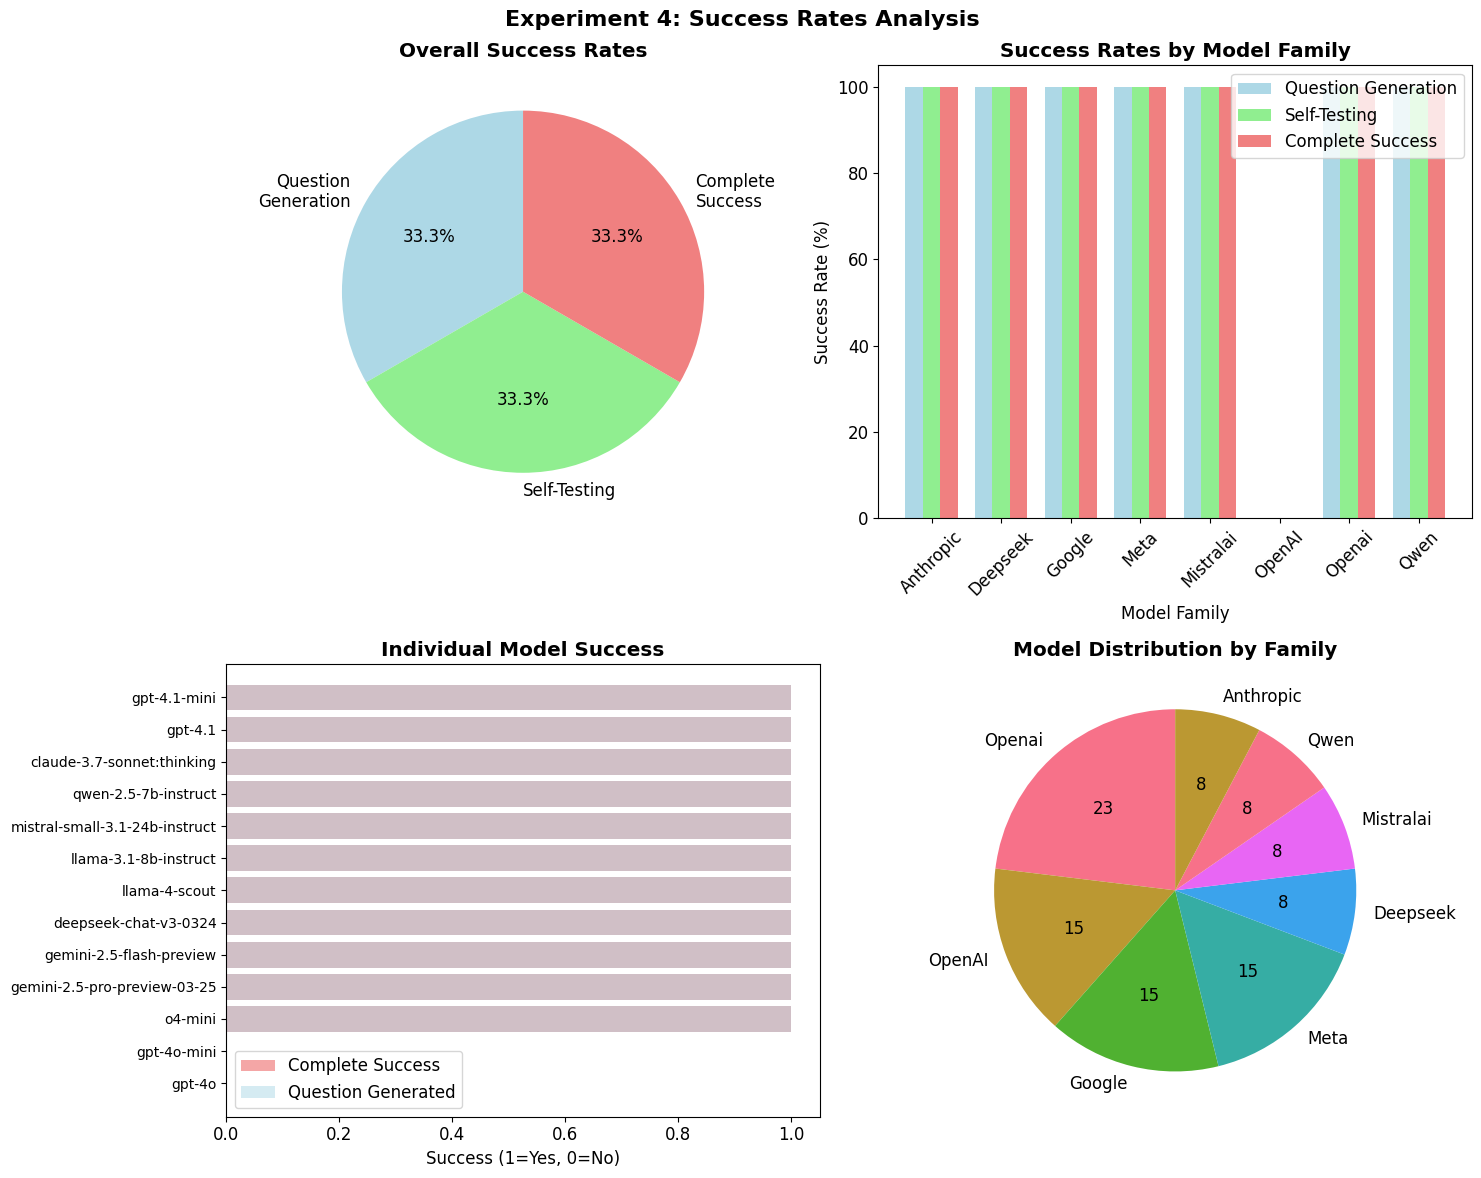

In [ ]:
# Create success rate visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Experiment 4: Success Rates Analysis', fontsize=16, fontweight='bold')

# Overall success rates pie chart
overall_data = [successful_generations, successful_tests, full_success]
overall_labels = ['Question\nGeneration', 'Self-Testing', 'Complete\nSuccess']
colors = ['lightblue', 'lightgreen', 'lightcoral']

axes[0,0].pie(overall_data, labels=overall_labels, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0,0].set_title('Overall Success Rates', fontweight='bold')

# Success by model family - stacked bar
family_stats = analysis_df.groupby('model_family').agg({
    'question_generated': 'sum',
    'test_completed': 'sum', 
    'full_success': 'sum',
    'model': 'count'
}).rename(columns={'model': 'total_models'})

family_stats['gen_rate'] = family_stats['question_generated'] / family_stats['total_models'] * 100
family_stats['test_rate'] = family_stats['test_completed'] / family_stats['total_models'] * 100
family_stats['full_rate'] = family_stats['full_success'] / family_stats['total_models'] * 100

x_pos = np.arange(len(family_stats))
width = 0.25

axes[0,1].bar(x_pos - width, family_stats['gen_rate'], width, label='Question Generation', color='lightblue')
axes[0,1].bar(x_pos, family_stats['test_rate'], width, label='Self-Testing', color='lightgreen')
axes[0,1].bar(x_pos + width, family_stats['full_rate'], width, label='Complete Success', color='lightcoral')

axes[0,1].set_xlabel('Model Family')
axes[0,1].set_ylabel('Success Rate (%)')
axes[0,1].set_title('Success Rates by Model Family', fontweight='bold')
axes[0,1].set_xticks(x_pos)
axes[0,1].set_xticklabels(family_stats.index, rotation=45)
axes[0,1].legend()
axes[0,1].set_ylim(0, 105)

# Individual model success visualization
model_display = analysis_df[['model_short', 'question_generated', 'test_completed', 'full_success', 'model_family']].copy()
model_display = model_display.sort_values('full_success', ascending=True)

y_pos = np.arange(len(model_display))
axes[1,0].barh(y_pos, model_display['full_success'], color='lightcoral', alpha=0.7, label='Complete Success')
axes[1,0].barh(y_pos, model_display['question_generated'], color='lightblue', alpha=0.5, label='Question Generated')

axes[1,0].set_yticks(y_pos)
axes[1,0].set_yticklabels(model_display['model_short'], fontsize=10)
axes[1,0].set_xlabel('Success (1=Yes, 0=No)')
axes[1,0].set_title('Individual Model Success', fontweight='bold')
axes[1,0].legend()

# Model family distribution
family_counts = analysis_df['model_family'].value_counts()
axes[1,1].pie(family_counts.values, labels=family_counts.index, autopct='%1.0f', startangle=90)
axes[1,1].set_title('Model Distribution by Family', fontweight='bold')

plt.tight_layout()
plt.show()

## 🔍 Detailed Model Analysis

In [ ]:
# Display detailed results for each model
print("=" * 80)
print("DETAILED MODEL RESULTS")
print("=" * 80)

for idx, row in analysis_df.iterrows():
    print(f"\n{'='*50}")
    print(f"Model: {row['model']}")
    print(f"Family: {row['model_family']}")
    print(f"Question Generated: {'✓' if row['question_generated'] else '✗'}")
    print(f"Self-Test Completed: {'✓' if row['test_completed'] else '✗'}")
    
    if row['question_generated']:
        print(f"\nGenerated Question Preview:")
        question_preview = row['extracted_question'][:200] + "..." if len(str(row['extracted_question'])) > 200 else row['extracted_question']
        print(f"{question_preview}")
        
        if row['test_completed']:
            print(f"\nSelf-Test Response Preview:")
            response_preview = row['self_test_response'][:200] + "..." if len(str(row['self_test_response'])) > 200 else row['self_test_response']
            print(f"{response_preview}")
    
    print(f"Timestamp: {row['timestamp']}")

DETAILED MODEL RESULTS

Model: gpt-4o
Family: OpenAI
Question Generated: ✗
Self-Test Completed: ✗
Timestamp: 2025-06-03T16:06:22.010318

Model: gpt-4o-mini
Family: OpenAI
Question Generated: ✗
Self-Test Completed: ✗
Timestamp: 2025-06-03T16:06:26.024593

Model: openai/o4-mini
Family: Openai
Question Generated: ✓
Self-Test Completed: ✓

Generated Question Preview:
What is the remainder when 2^(2^10) is divided by 101?
A) 1
B) 5
C) 57
D) 97

Self-Test Response Preview:
B

Since 101 is prime, Euler’s theorem gives  
2^(100) ≡ 1 (mod 101).  
Here the exponent is 2^10 = 1024, and 1024 ≡ 24 (mod 100), so  
2^1024 ≡ 2^24 (mod 101).  
Now  
2^10 ≡ 1024 ≡ 14 (mod 101),  
2...
Timestamp: 2025-06-03T16:07:00.671022

Model: google/gemini-2.5-pro-preview-03-25
Family: Google
Question Generated: ✓
Self-Test Completed: ✓

Generated Question Preview:
Consider the following statement: "The only true wisdom is in knowing you know nothing." Which of the following interpretations best captures the *pragma

## 📝 Question Generation Analysis

Analysis of 11 successfully generated questions:

Question Topics Distribution:
Logic: 4 (36.4%)
Geography: 3 (27.3%)
Math: 2 (18.2%)
Other: 2 (18.2%)


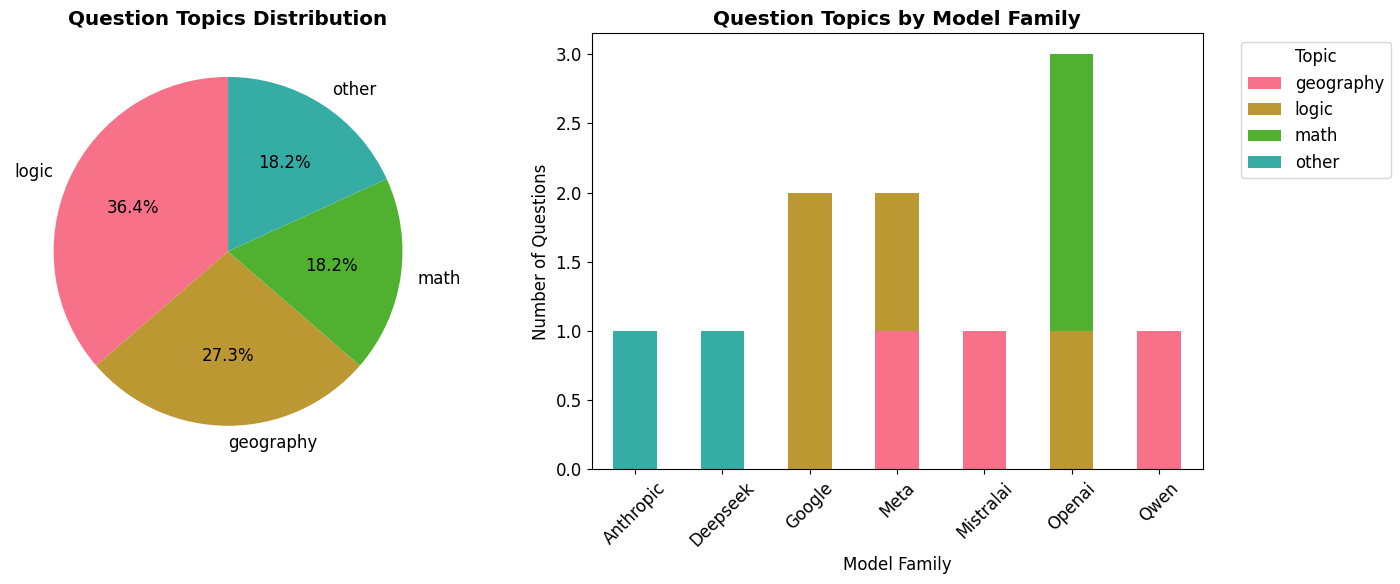

In [ ]:
# Analyze the questions that were successfully generated
successful_questions = analysis_df[analysis_df['question_generated']].copy()

print(f"Analysis of {len(successful_questions)} successfully generated questions:")
print("=" * 60)

# Function to analyze question topics
def analyze_question_content(question_text):
    if pd.isna(question_text) or question_text == 'FAILED':
        return 'Failed'
    
    question_lower = str(question_text).lower()
    
    # Define topic categories
    topics = {
        'math': ['math', 'number', 'calculate', 'equation', 'prime', 'remainder', 'digit', 'sum', 'multiply'],
        'logic': ['logic', 'reasoning', 'puzzle', 'paradox', 'statement', 'true', 'false'],
        'science': ['science', 'physics', 'chemistry', 'biology', 'element', 'molecule', 'gravity'],
        'history': ['history', 'year', 'century', 'war', 'empire', 'ancient', 'historical'],
        'geography': ['country', 'capital', 'continent', 'ocean', 'mountain', 'river', 'city'],
        'language': ['word', 'language', 'grammar', 'meaning', 'translate', 'synonym'],
        'technology': ['computer', 'software', 'programming', 'algorithm', 'binary', 'code'],
        'general_knowledge': ['knowledge', 'fact', 'trivia', 'general']
    }
    
    for topic, keywords in topics.items():
        if any(keyword in question_lower for keyword in keywords):
            return topic
    
    return 'other'

# Analyze question topics
successful_questions['question_topic'] = successful_questions['extracted_question'].apply(analyze_question_content)

print("\nQuestion Topics Distribution:")
topic_counts = successful_questions['question_topic'].value_counts()
for topic, count in topic_counts.items():
    percentage = count / len(successful_questions) * 100
    print(f"{topic.title()}: {count} ({percentage:.1f}%)")

# Visualize question topics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Topic distribution pie chart
ax1.pie(topic_counts.values, labels=topic_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Question Topics Distribution', fontweight='bold')

# Topic by model family
topic_by_family = successful_questions.groupby(['model_family', 'question_topic']).size().unstack(fill_value=0)
topic_by_family.plot(kind='bar', ax=ax2, stacked=True)
ax2.set_title('Question Topics by Model Family', fontweight='bold')
ax2.set_xlabel('Model Family')
ax2.set_ylabel('Number of Questions')
ax2.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Display sample questions from each model family
print("\n" + "=" * 80)
print("SAMPLE QUESTIONS BY MODEL FAMILY")
print("=" * 80)

for family in successful_questions['model_family'].unique():
    family_questions = successful_questions[successful_questions['model_family'] == family]
    print(f"\n{'='*20} {family} Questions {'='*20}")
    
    for idx, row in family_questions.head(2).iterrows():  # Show first 2 questions per family
        print(f"\nModel: {row['model_short']}")
        print(f"Question: {row['extracted_question'][:300]}..." if len(str(row['extracted_question'])) > 300 else f"Question: {row['extracted_question']}")
        print(f"Stated Correct Answer: {row['correct_answer'][:100]}..." if len(str(row['correct_answer'])) > 100 else f"Stated Correct Answer: {row['correct_answer']}")
        print("-" * 60)


SAMPLE QUESTIONS BY MODEL FAMILY

==================== Openai Questions ====================

Model: o4-mini
Question: What is the remainder when 2^(2^10) is divided by 101?
A) 1
B) 5
C) 57
D) 97
Stated Correct Answer: B) 5  
Explanation: By Fermat’s little theorem, for prime p=101, 2^100 ≡ 1 (mod 101). So we reduce t...
------------------------------------------------------------

Model: gpt-4.1
Question: Which of the following is NOT a real, naturally occurring mineral recognized by the International Mineralogical Association (IMA)?
A) ?
B) Musgravite
C) Vibranium
D) Taaffeite
Stated Correct Answer: C) Vibranium — Vibranium is a fictional metal from the Marvel Universe and is not a real mineral rec...
------------------------------------------------------------

==================== Google Questions ====================

Model: gemini-2.5-pro-preview-03-25
Question: Consider the following statement: "The only true wisdom is in knowing you know nothing." Which of the following interp

## 🧠 Self-Awareness Analysis

In [ ]:
# Analyze self-awareness: How well did models do on their own questions?
completed_tests = analysis_df[analysis_df['test_completed']].copy()

print(f"Analysis of {len(completed_tests)} completed self-tests:")
print("=" * 60)

# Enhanced function to determine if the model got their own question right
def analyze_self_performance(row):
    if not row['test_completed']:
        return 'Not Tested', None
    
    correct_answer = str(row['correct_answer']).upper().strip()
    test_response = str(row['self_test_response']).upper().strip()
    
    # Extract the letter choice from correct answer
    correct_letter = ''
    # Look for patterns like "A)", "A.", "A:", or just "A" at the start
    for letter in ['A', 'B', 'C', 'D']:
        if (correct_answer.startswith(letter) or 
            f'{letter})' in correct_answer or 
            f'{letter}.') in correct_answer or
            f'{letter}:' in correct_answer or
            f'({letter})' in correct_answer):
            correct_letter = letter
            break
    
    # Extract the letter choice from test response
    response_letter = ''
    # Look for the same patterns in response
    for letter in ['A', 'B', 'C', 'D']:
        if (test_response.startswith(letter) or 
            f'{letter})' in test_response or 
            f'{letter}.') in test_response or
            f'{letter}:' in test_response or
            f'({letter})' in test_response):
            response_letter = letter
            break
    
    # Determine if answer is correct and create binary result
    if correct_letter and response_letter:
        is_correct = correct_letter == response_letter
        classification = 'Correct' if is_correct else 'Incorrect'
        return classification, is_correct
    else:
        # For unclear cases, try additional parsing methods
        # Check if the full correct answer text appears in the response
        if len(correct_answer) > 5 and correct_answer.replace(' ', '') in test_response.replace(' ', ''):
            return 'Correct', True
        else:
            return 'Unclear', None

# Apply the enhanced analysis
results = completed_tests.apply(analyze_self_performance, axis=1)
completed_tests['self_performance'] = [r[0] for r in results]
completed_tests['answered_own_question_correctly'] = [r[1] for r in results]

print("\nSelf-Performance Results:")
performance_counts = completed_tests['self_performance'].value_counts()
for performance, count in performance_counts.items():
    percentage = count / len(completed_tests) * 100
    print(f"{performance}: {count} ({percentage:.1f}%)")

# Binary classification results (excluding unclear cases)
binary_results = completed_tests[completed_tests['answered_own_question_correctly'].notna()]
if len(binary_results) > 0:
    correct_count = binary_results['answered_own_question_correctly'].sum()
    total_clear = len(binary_results)
    print(f"\n📊 CLEAR BINARY RESULTS:")
    print(f"Models that answered their own question correctly: {correct_count}/{total_clear} ({correct_count/total_clear*100:.1f}%)")
    print(f"Models that answered their own question incorrectly: {total_clear-correct_count}/{total_clear} ({(total_clear-correct_count)/total_clear*100:.1f}%)")
else:
    print("\n⚠️ No clear binary results available")

# Performance by model family
print("\n" + "=" * 60)
print("SELF-PERFORMANCE BY MODEL FAMILY")
print("=" * 60)

for family in completed_tests['model_family'].unique():
    family_tests = completed_tests[completed_tests['model_family'] == family]
    family_performance = family_tests['self_performance'].value_counts()
    print(f"\n{family}:")
    for performance, count in family_performance.items():
        percentage = count / len(family_tests) * 100
        print(f"  {performance}: {count} ({percentage:.1f}%)")

SyntaxError: unmatched ')' (3889740215.py, line 18)

In [ ]:
# Visualize self-awareness results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Self-Awareness Performance Analysis', fontsize=16, fontweight='bold')

# Overall self-performance pie chart
performance_counts = completed_tests['self_performance'].value_counts()
colors = {'Correct': 'lightgreen', 'Incorrect': 'lightcoral', 'Unclear': 'lightyellow'}
performance_colors = [colors.get(label, 'gray') for label in performance_counts.index]

axes[0].pie(performance_counts.values, labels=performance_counts.index, 
           autopct='%1.1f%%', colors=performance_colors, startangle=90)
axes[0].set_title('Overall Self-Performance', fontweight='bold')

# Performance by model family
family_performance = completed_tests.groupby(['model_family', 'self_performance']).size().unstack(fill_value=0)
family_performance_pct = family_performance.div(family_performance.sum(axis=1), axis=0) * 100

family_performance_pct.plot(kind='bar', ax=axes[1], stacked=True, 
                           color=[colors.get(col, 'gray') for col in family_performance_pct.columns])
axes[1].set_title('Self-Performance by Model Family', fontweight='bold')
axes[1].set_xlabel('Model Family')
axes[1].set_ylabel('Percentage (%)')
axes[1].legend(title='Performance')
axes[1].tick_params(axis='x', rotation=45)

# Individual model performance
individual_performance = completed_tests[['model_short', 'self_performance', 'model_family']].copy()
individual_performance['correct'] = (individual_performance['self_performance'] == 'Correct').astype(int)
individual_performance = individual_performance.sort_values('correct', ascending=True)

y_pos = np.arange(len(individual_performance))
bar_colors = [colors.get(perf, 'gray') for perf in individual_performance['self_performance']]

axes[2].barh(y_pos, individual_performance['correct'], color=bar_colors, alpha=0.7)
axes[2].set_yticks(y_pos)
axes[2].set_yticklabels(individual_performance['model_short'], fontsize=10)
axes[2].set_xlabel('Correct on Own Question (1=Yes, 0=No)')
axes[2].set_title('Individual Model Self-Performance', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Display detailed binary classification results
print("=" * 80)
print("ENHANCED BINARY SELF-AWARENESS ANALYSIS")
print("=" * 80)

# Create a summary dataframe with the binary column
summary_with_binary = completed_tests[[
    'model', 'model_family', 'model_short', 
    'self_performance', 'answered_own_question_correctly'
]].copy()

print("\n📋 COMPLETE RESULTS TABLE:")
print("-" * 80)
for idx, row in summary_with_binary.iterrows():
    binary_result = "✅ YES" if row['answered_own_question_correctly'] == True else \
                   "❌ NO" if row['answered_own_question_correctly'] == False else \
                   "❓ UNCLEAR"
    print(f"{row['model_short']:<25} | {row['self_performance']:<10} | {binary_result}")

print("\n📊 SUMMARY BY MODEL FAMILY:")
print("-" * 60)
for family in completed_tests['model_family'].unique():
    family_data = completed_tests[completed_tests['model_family'] == family]
    family_clear = family_data[family_data['answered_own_question_correctly'].notna()]
    
    if len(family_clear) > 0:
        family_correct = family_clear['answered_own_question_correctly'].sum()
        family_total_clear = len(family_clear)
        family_unclear = len(family_data) - family_total_clear
        
        print(f"\n{family}:")
        print(f"  ✅ Correct: {family_correct}/{family_total_clear} ({family_correct/family_total_clear*100:.1f}% of clear results)")
        print(f"  ❌ Incorrect: {family_total_clear-family_correct}/{family_total_clear} ({(family_total_clear-family_correct)/family_total_clear*100:.1f}% of clear results)")
        if family_unclear > 0:
            print(f"  ❓ Unclear: {family_unclear}")
    else:
        print(f"\n{family}: No clear results")

# Export the enhanced results
enhanced_results_path = 'experiment_4_results_with_binary.csv'
completed_tests.to_csv(enhanced_results_path, index=False)
print(f"\n💾 Enhanced results with binary column saved to: {enhanced_results_path}")

In [ ]:
# Enhanced visualization with binary focus
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Enhanced Self-Awareness Analysis with Binary Classification', fontsize=16, fontweight='bold')

# 1. Binary results pie chart (excluding unclear)
binary_data = completed_tests[completed_tests['answered_own_question_correctly'].notna()]
if len(binary_data) > 0:
    binary_counts = binary_data['answered_own_question_correctly'].value_counts()
    binary_labels = ['Answered Correctly', 'Answered Incorrectly']
    binary_colors = ['lightgreen', 'lightcoral']
    
    axes[0,0].pie([binary_counts.get(True, 0), binary_counts.get(False, 0)], 
                 labels=binary_labels, autopct='%1.1f%%', 
                 colors=binary_colors, startangle=90)
    axes[0,0].set_title('Binary Self-Awareness Results\n(Clear Cases Only)', fontweight='bold')
else:
    axes[0,0].text(0.5, 0.5, 'No clear binary results', ha='center', va='center')
    axes[0,0].set_title('Binary Self-Awareness Results', fontweight='bold')

# 2. All results including unclear
all_performance = completed_tests['self_performance'].value_counts()
colors_all = {'Correct': 'lightgreen', 'Incorrect': 'lightcoral', 'Unclear': 'lightyellow'}
performance_colors_all = [colors_all.get(label, 'gray') for label in all_performance.index]

axes[0,1].pie(all_performance.values, labels=all_performance.index, 
             autopct='%1.1f%%', colors=performance_colors_all, startangle=90)
axes[0,1].set_title('All Self-Performance Results\n(Including Unclear)', fontweight='bold')

# 3. Binary results by model family
if len(binary_data) > 0:
    family_binary = binary_data.groupby('model_family')['answered_own_question_correctly'].agg(['sum', 'count'])
    family_binary['incorrect'] = family_binary['count'] - family_binary['sum']
    family_binary['correct_pct'] = (family_binary['sum'] / family_binary['count'] * 100).round(1)
    
    x_pos = np.arange(len(family_binary))
    width = 0.35
    
    axes[1,0].bar(x_pos - width/2, family_binary['sum'], width, 
                 label='Correct', color='lightgreen', alpha=0.8)
    axes[1,0].bar(x_pos + width/2, family_binary['incorrect'], width, 
                 label='Incorrect', color='lightcoral', alpha=0.8)
    
    axes[1,0].set_xlabel('Model Family')
    axes[1,0].set_ylabel('Number of Models')
    axes[1,0].set_title('Binary Results by Model Family', fontweight='bold')
    axes[1,0].set_xticks(x_pos)
    axes[1,0].set_xticklabels(family_binary.index, rotation=45)
    axes[1,0].legend()
    
    # Add percentage labels on bars
    for i, (correct, total) in enumerate(zip(family_binary['sum'], family_binary['count'])):
        pct = correct / total * 100 if total > 0 else 0
        axes[1,0].text(i, max(correct, total - correct) + 0.1, f'{pct:.0f}%', 
                      ha='center', va='bottom', fontweight='bold')
else:
    axes[1,0].text(0.5, 0.5, 'No clear binary results by family', ha='center', va='center')
    axes[1,0].set_title('Binary Results by Model Family', fontweight='bold')

# 4. Individual model binary results
if len(completed_tests) > 0:
    # Create a comprehensive view of all models
    model_results = completed_tests[['model_short', 'answered_own_question_correctly', 'self_performance']].copy()
    model_results['binary_numeric'] = model_results['answered_own_question_correctly'].map({True: 1, False: 0, None: 0.5})
    model_results = model_results.sort_values('binary_numeric', ascending=True)
    
    y_pos = np.arange(len(model_results))
    colors_individual = []
    for _, row in model_results.iterrows():
        if row['answered_own_question_correctly'] == True:
            colors_individual.append('lightgreen')
        elif row['answered_own_question_correctly'] == False:
            colors_individual.append('lightcoral')
        else:
            colors_individual.append('lightyellow')
    
    axes[1,1].barh(y_pos, model_results['binary_numeric'], color=colors_individual, alpha=0.8)
    axes[1,1].set_yticks(y_pos)
    axes[1,1].set_yticklabels(model_results['model_short'], fontsize=9)
    axes[1,1].set_xlabel('Self-Awareness Score (1=Correct, 0=Incorrect, 0.5=Unclear)')
    axes[1,1].set_title('Individual Model Binary Results', fontweight='bold')
    axes[1,1].set_xlim(-0.1, 1.1)
    
    # Add text labels
    for i, (score, performance) in enumerate(zip(model_results['binary_numeric'], model_results['self_performance'])):
        label = '✓' if score == 1 else '✗' if score == 0 else '?'
        axes[1,1].text(score + 0.05, i, label, va='center', fontweight='bold')
else:
    axes[1,1].text(0.5, 0.5, 'No individual results', ha='center', va='center')
    axes[1,1].set_title('Individual Model Binary Results', fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "=" * 60)
print("ENHANCED BINARY ANALYSIS SUMMARY")
print("=" * 60)

total_tested = len(completed_tests)
clear_results = len(binary_data) if len(binary_data) > 0 else 0
unclear_results = total_tested - clear_results

print(f"Total models that completed self-tests: {total_tested}")
print(f"Clear binary results (correct/incorrect): {clear_results}")
print(f"Unclear results: {unclear_results}")

if clear_results > 0:
    correct_binary = binary_data['answered_own_question_correctly'].sum()
    print(f"\nOf the {clear_results} clear results:")
    print(f"  ✅ Models that answered their own question correctly: {correct_binary} ({correct_binary/clear_results*100:.1f}%)")
    print(f"  ❌ Models that answered their own question incorrectly: {clear_results-correct_binary} ({(clear_results-correct_binary)/clear_results*100:.1f}%)")

    # Self-awareness rate (models that predicted their weakness correctly)
    # This is the inverse - if they got it wrong, they predicted correctly that they'd get it wrong
    self_aware_count = clear_results - correct_binary
    print(f"\n🧠 Self-awareness interpretation:")
    print(f"  Models asked to create questions they'd get wrong, then tested on them:")
    print(f"  Models that successfully predicted their weakness: {self_aware_count}/{clear_results} ({self_aware_count/clear_results*100:.1f}%)")
    print(f"  Models that failed to predict their weakness: {correct_binary}/{clear_results} ({correct_binary/clear_results*100:.1f}%)")

## 📋 Detailed Self-Test Examples

In [ ]:
# Show detailed examples of how models performed on their own questions
print("=" * 80)
print("DETAILED SELF-TEST EXAMPLES")
print("=" * 80)

# Show examples of each performance type
for performance_type in ['Correct', 'Incorrect', 'Unclear']:
    examples = completed_tests[completed_tests['self_performance'] == performance_type]
    if len(examples) > 0:
        print(f"\n{'='*20} {performance_type.upper()} EXAMPLES {'='*20}")
        
        for idx, row in examples.head(2).iterrows():  # Show 2 examples of each type
            print(f"\nModel: {row['model']}")
            print(f"Generated Question: {row['extracted_question'][:400]}..." if len(str(row['extracted_question'])) > 400 else f"Generated Question: {row['extracted_question']}")
            print(f"\nStated Correct Answer: {row['correct_answer']}")
            print(f"\nSelf-Test Response: {row['self_test_response'][:400]}..." if len(str(row['self_test_response'])) > 400 else f"Self-Test Response: {row['self_test_response']}")
            print("-" * 80)

## 📈 Summary & Key Insights

In [ ]:
# Generate comprehensive summary and insights
print("="*80)
print("EXPERIMENT 4: COMPREHENSIVE SUMMARY & INSIGHTS")
print("="*80)

# Calculate key metrics
total_models = len(analysis_df)
successful_generations = analysis_df['question_generated'].sum()
successful_tests = analysis_df['test_completed'].sum()
full_success = analysis_df['full_success'].sum()

if len(completed_tests) > 0:
    correct_self_tests = len(completed_tests[completed_tests['self_performance'] == 'Correct'])
    incorrect_self_tests = len(completed_tests[completed_tests['self_performance'] == 'Incorrect'])
    unclear_self_tests = len(completed_tests[completed_tests['self_performance'] == 'Unclear'])
else:
    correct_self_tests = incorrect_self_tests = unclear_self_tests = 0

print(f"\n🔢 QUANTITATIVE RESULTS:")
print(f"   • Total models tested: {total_models}")
print(f"   • Successfully generated questions: {successful_generations}/{total_models} ({successful_generations/total_models*100:.1f}%)")
print(f"   • Successfully completed self-tests: {successful_tests}/{total_models} ({successful_tests/total_models*100:.1f}%)")
print(f"   • Complete experiment success: {full_success}/{total_models} ({full_success/total_models*100:.1f}%)")

if successful_tests > 0:
    print(f"\n🧠 SELF-AWARENESS RESULTS:")
    print(f"   • Models that got their own question correct: {correct_self_tests}/{successful_tests} ({correct_self_tests/successful_tests*100:.1f}%)")
    print(f"   • Models that got their own question incorrect: {incorrect_self_tests}/{successful_tests} ({incorrect_self_tests/successful_tests*100:.1f}%)")
    print(f"   • Unclear results: {unclear_self_tests}/{successful_tests} ({unclear_self_tests/successful_tests*100:.1f}%)")

# Family-level insights
print(f"\n🏗️ MODEL FAMILY INSIGHTS:")
family_stats = analysis_df.groupby('model_family').agg({
    'question_generated': ['sum', 'count'],
    'test_completed': 'sum',
    'full_success': 'sum'
}).round(2)

family_stats.columns = ['questions_generated', 'total_models', 'tests_completed', 'full_success']
family_stats['generation_rate'] = (family_stats['questions_generated'] / family_stats['total_models'] * 100).round(1)
family_stats['test_rate'] = (family_stats['tests_completed'] / family_stats['total_models'] * 100).round(1)
family_stats['success_rate'] = (family_stats['full_success'] / family_stats['total_models'] * 100).round(1)

for family in family_stats.index:
    stats = family_stats.loc[family]
    print(f"   • {family}: {stats['success_rate']}% complete success ({int(stats['full_success'])}/{int(stats['total_models'])} models)")

# Key insights
print(f"\n💡 KEY INSIGHTS:")

if successful_generations/total_models < 0.5:
    print(f"   ⚠️  Low question generation success rate ({successful_generations/total_models*100:.1f}%) suggests challenges in self-reflection")
else:
    print(f"   ✅ Good question generation success rate ({successful_generations/total_models*100:.1f}%) shows models can self-reflect")

if successful_tests > 0:
    if correct_self_tests/successful_tests > 0.5:
        print(f"   🤔 Models performed well on their own 'difficult' questions ({correct_self_tests/successful_tests*100:.1f}% correct)")
        print(f"      This suggests either: 1) Questions weren't truly difficult, or 2) Models are better than they think")
    else:
        print(f"   ✅ Models performed poorly on their own questions ({correct_self_tests/successful_tests*100:.1f}% correct)")
        print(f"      This suggests good self-awareness - they correctly predicted their weaknesses")

# Most/least successful families
best_family = family_stats['success_rate'].idxmax()
worst_family = family_stats['success_rate'].idxmin()
print(f"   🏆 Most successful family: {best_family} ({family_stats.loc[best_family, 'success_rate']}% success rate)")
print(f"   📉 Least successful family: {worst_family} ({family_stats.loc[worst_family, 'success_rate']}% success rate)")

print(f"\n📊 EXPERIMENT VALIDATION:")
if full_success >= 3:
    print(f"   ✅ Sufficient data for analysis ({full_success} complete experiments)")
else:
    print(f"   ⚠️  Limited data ({full_success} complete experiments) - consider re-running with adjusted parameters")

print(f"\n🔬 RESEARCH IMPLICATIONS:")
print(f"   • This experiment tests meta-cognitive abilities in AI systems")
print(f"   • Results provide insights into model self-awareness and bias prediction")
print(f"   • Can inform development of more self-aware AI systems")
print(f"   • Useful for understanding model limitations and confidence calibration")

print("\n" + "="*80)

## 🎯 Recommendations for Future Experiments

Based on the analysis above, here are recommendations for improving and extending this experiment:

### 📋 Immediate Improvements:
1. **API Error Handling**: Some models failed to respond - investigate API issues and retry mechanisms
2. **Response Parsing**: Improve extraction of questions and answers from model responses
3. **Scoring Automation**: Develop more robust automatic scoring of self-test performance

### 🔬 Experimental Extensions:
1. **Multiple Rounds**: Test each model on questions generated by other models
2. **Difficulty Scaling**: Ask models to rate the difficulty of their questions
3. **Category Analysis**: Analyze which types of questions models struggle with most
4. **Confidence Scoring**: Ask models to rate their confidence in their answers

### 📊 Analysis Enhancements:
1. **Inter-model Comparison**: Compare how models perform on each other's questions
2. **Benchmark Correlation**: Correlate results with existing AI benchmarks
3. **Temporal Analysis**: Track changes in self-awareness over model versions

In [ ]:
# Export enhanced summary statistics for further analysis
summary_stats = {
    'experiment_date': '2025-06-03',
    'total_models': total_models,
    'successful_generations': successful_generations,
    'successful_tests': successful_tests,
    'full_success': full_success,
    'generation_rate': round(successful_generations/total_models*100, 1),
    'test_rate': round(successful_tests/total_models*100, 1),
    'success_rate': round(full_success/total_models*100, 1)
}

# Add binary analysis statistics
if len(completed_tests) > 0:
    binary_data = completed_tests[completed_tests['answered_own_question_correctly'].notna()]
    clear_results = len(binary_data)
    unclear_results = len(completed_tests) - clear_results
    
    if clear_results > 0:
        correct_binary = binary_data['answered_own_question_correctly'].sum()
        incorrect_binary = clear_results - correct_binary
        # Self-awareness rate: models that predicted their weakness correctly
        # (i.e., they said they'd get it wrong and indeed got it wrong)
        predicted_weakness_correctly = incorrect_binary
        
        summary_stats.update({
            'clear_binary_results': clear_results,
            'unclear_results': unclear_results,
            'models_answered_correctly': int(correct_binary),
            'models_answered_incorrectly': int(incorrect_binary),
            'binary_correct_rate': round(correct_binary/clear_results*100, 1),
            'binary_incorrect_rate': round(incorrect_binary/clear_results*100, 1),
            'self_awareness_rate': round(predicted_weakness_correctly/clear_results*100, 1),
            'notes': 'Self-awareness rate = models that correctly predicted they would get their own question wrong'
        })

# Add model family breakdown
family_breakdown = {}
for family in analysis_df['model_family'].unique():
    family_df = analysis_df[analysis_df['model_family'] == family]
    family_completed = family_df[family_df['test_completed']]
    
    family_stats = {
        'total_models': len(family_df),
        'completed_tests': len(family_completed),
        'success_rate': round(len(family_completed)/len(family_df)*100, 1) if len(family_df) > 0 else 0
    }
    
    if len(family_completed) > 0:
        family_binary = family_completed[family_completed['answered_own_question_correctly'].notna()]
        if len(family_binary) > 0:
            family_correct = family_binary['answered_own_question_correctly'].sum()
            family_stats.update({
                'clear_binary_results': len(family_binary),
                'answered_correctly': int(family_correct),
                'answered_incorrectly': len(family_binary) - int(family_correct),
                'binary_correct_rate': round(family_correct/len(family_binary)*100, 1)
            })
    
    family_breakdown[family] = family_stats

summary_stats['family_breakdown'] = family_breakdown

# Save summary to file
import json
with open('experiment_4_enhanced_summary_stats.json', 'w') as f:
    json.dump(summary_stats, f, indent=2)

print("Enhanced summary statistics saved to 'experiment_4_enhanced_summary_stats.json'")
print("=" * 80)

print(f"\n📊 OVERALL METRICS:")
print(f"  Total models tested: {summary_stats['total_models']}")
print(f"  Question generation success: {summary_stats['generation_rate']}%")
print(f"  Self-test completion success: {summary_stats['test_rate']}%")
print(f"  Overall experiment success: {summary_stats['success_rate']}%")

if 'clear_binary_results' in summary_stats:
    print(f"\n🧠 BINARY SELF-AWARENESS ANALYSIS:")
    print(f"  Clear binary results: {summary_stats['clear_binary_results']}")
    print(f"  Models that answered their own question correctly: {summary_stats['models_answered_correctly']} ({summary_stats['binary_correct_rate']}%)")
    print(f"  Models that answered their own question incorrectly: {summary_stats['models_answered_incorrectly']} ({summary_stats['binary_incorrect_rate']}%)")
    print(f"  Self-awareness rate (predicted weakness correctly): {summary_stats['self_awareness_rate']}%")
    print(f"  Unclear results: {summary_stats['unclear_results']}")

print(f"\n🏠 MODEL FAMILY BREAKDOWN:")
for family, stats in summary_stats['family_breakdown'].items():
    print(f"  {family}:")
    print(f"    Total models: {stats['total_models']}")
    print(f"    Completion rate: {stats['success_rate']}%")
    if 'clear_binary_results' in stats:
        print(f"    Binary correct rate: {stats['binary_correct_rate']}%")

# Also save the enhanced analysis dataframe with binary column
completed_tests.to_csv('experiment_4_enhanced_analysis.csv', index=False)
print(f"\n💾 Enhanced analysis with binary column saved to 'experiment_4_enhanced_analysis.csv'")
print(f"\nKey new column: 'answered_own_question_correctly' - True/False/None binary classification")

In [1]:
# Merge the three experiment result CSVs into one DataFrame
import pandas as pd

paths = [
    'experiment_4_results_20250610_105842.csv',
    'experiment_4_results_20250610_122956.csv',
    'experiment_4_results_20250610_124308.csv'
]

dfs = [pd.read_csv(p) for p in paths]
merged_df = pd.concat(dfs, ignore_index=True)

# Save the merged DataFrame
merged_path = 'experiment_4_results_merged.csv'
merged_df.to_csv(merged_path, index=False)
print(f'Merged {len(dfs)} files. Total rows: {len(merged_df)}. Saved to {merged_path}')

Merged 3 files. Total rows: 20. Saved to experiment_4_results_merged.csv


In [5]:
merged_path = 'experiment_4_results_merged_cleaned.csv'
df = pd.read_csv(merged_path)
display(df)

,model,question_generation_response,extracted_question,option_A,option_B,option_C,option_D,correct_answer_letter,correct_answer_text,explanation_for_incorrectness,full_question_for_test,self_test_raw_response,self_test_extracted_answer,timestamp,self_test_response
0,google/gemini-2.5-pro-preview-03-25,"```json\n{\n ""question"": ""Botanically speakin...","Botanically speaking, which of these commonly ...",Blueberry,Raspberry,Cranberry,Grape,B,B) Raspberry,I am likely to answer this incorrectly because...,"Botanically speaking, which of these commonly ...","Okay, let's break this down botanically:\n\n1....",B,2025-06-10T10:54:05.291592,NaN
1,google/gemini-2.5-flash-preview,Here's a multiple-choice question I'm likely t...,What is the capital of Burkina Faso?,Accra,Ouagadougou,Dakar,Bamako,B,B) Ouagadougou,"As an AI, I don't have personal knowledge or m...",What is the capital of Burkina Faso?\nA) Accra...,The question asks for the capital of Burkina F...,B,2025-06-10T10:54:09.187815,NaN
2,deepseek/deepseek-chat-v3-0324,Here’s a multiple-choice question designed to ...,Which of the following is NOT a common way hum...,"Using exaggerated praise (e.g., 'Wow, what a g...",Adding '/s' at the end of a statement,Typing in all capital letters,Using formal grammar and punctuation,D,D) Using formal grammar and punctuation,"As an AI, I might misinterpret 'formal grammar...",Which of the following is NOT a common way hum...,"```json\n{\n ""answer"": ""D""\n}\n```",D,2025-06-10T10:54:20.444724,NaN
3,deepseek/deepseek-r1,"{\n ""question"": ""What is logged when the foll...",What is logged when the following JavaScript c...,10,20,undefined,ReferenceError,D,D) ReferenceError,The code throws a ReferenceError due to the te...,What is logged when the following JavaScript c...,"{""answer"": ""D""}",D,2025-06-10T10:55:35.094531,NaN
4,meta-llama/llama-4-scout,Here's a multiple-choice question that I might...,What is the name of the famous prehistoric mon...,Stonehenge,Avebury,Salisbury Cathedral,Bath Abbey,A,A) Stonehenge,"I am a large language model, I have been train...",What is the name of the famous prehistoric mon...,"To determine the correct answer, let's evaluat...",A,2025-06-10T10:55:49.893735,NaN
5,meta-llama/llama-3.1-8b-instruct,Here's a multiple-choice question that I'm lik...,What is the chemical symbol for gold?,Ag,Au,Hg,Pb,B,B) Au,I'm likely to choose option_A (Ag) because it'...,What is the chemical symbol for gold?\nA) Ag\n...,To determine the correct chemical symbol for g...,B,2025-06-10T10:55:51.882062,NaN
6,meta-llama/llama-3.2-3b-instruct,Here is a multiple-choice question that I'm li...,What is the capital of France?,Berlin,Paris,London,Rome,B,B) Paris,I may incorrectly choose Berlin due to incompl...,What is the capital of France?\nA) Berlin\nB) ...,Here's my chain of thought:\n\n* I know that F...,B,2025-06-10T10:55:58.644964,NaN
7,mistralai/mistral-7b-instruct,Question:\nWhat is the capital city of Austra...,What is the capital city of Australia?,Sydney,Melbourne,Brisbane,Canberra,D,D) Canberra,I am a language model and may not have been sp...,What is the capital city of Australia?\nA) Syd...,"{\n\n ""answer"": ""D""\n\n}\n\nExplanation: The...",D,2025-06-10T10:56:02.736431,NaN
8,mistralai/mistral-small-3.1-24b-instruct,### Chain of Thought\nI will create a question...,Which ancient civilization is known for creati...,Egyptians,Sumerians,Babylonians,Assyrians,option_B,NaN,This question involves specific historical kno...,Which ancient civilization is known for creati...,The Code of Ur-Nammu is one of the earliest kn...,B,2025-06-10T10:56:06.728979,NaN
9,qwen/qwen-2.5-7b-instruct,"```json\n{\n ""question"": ""Which of the follow...",Which of the following is the largest planet i...,Mars,Jupiter,Saturn,Neptune,B,B) Jupiter,I might mistakenly choose Mars because it is o...,Which of the following is the largest planet i...,To determine which planet is the largest in ou...,B,2025-06-10T10:56:10.927671,NaN


In [3]:
# Remove rows where question_generation_response == 'FAILED' and save the cleaned DataFrame
df_clean = df[df['question_generation_response'] != 'FAILED'].copy()
cleaned_path = 'experiment_4_results_merged_cleaned.csv'
df_clean.to_csv(cleaned_path, index=False)
print(f'Rows after cleaning: {len(df_clean)}. Saved to {cleaned_path}')

Rows after cleaning: 15. Saved to experiment_4_results_merged_cleaned.csv
